# Import Required Libraries

Import `kagglehub` and `KaggleDatasetAdapter` to enable loading datasets directly from Kaggle.

In [20]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load House Prices Dataset from Kaggle

Use `kagglehub` to download and load the `train.csv` file from the `lespin/house-prices-dataset` Kaggle dataset into a pandas DataFrame.

In [21]:
file_path = "train.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "lespin/house-prices-dataset",
    file_path,
)

C:\Users\Welton Dionisio\AppData\Local\Temp\ipykernel_20288\2325293316.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


# Explore Dataset Structure

Display the first few rows of the DataFrame to inspect the structure and contents of the dataset.

In [22]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Describe Dataset Statistics

Show summary statistics of the dataset using `df.describe()` to better understand the numerical features.

In [23]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Regressão Linear

MAE: 21785.71
MSE: 1207136598.41
R²: 0.8426


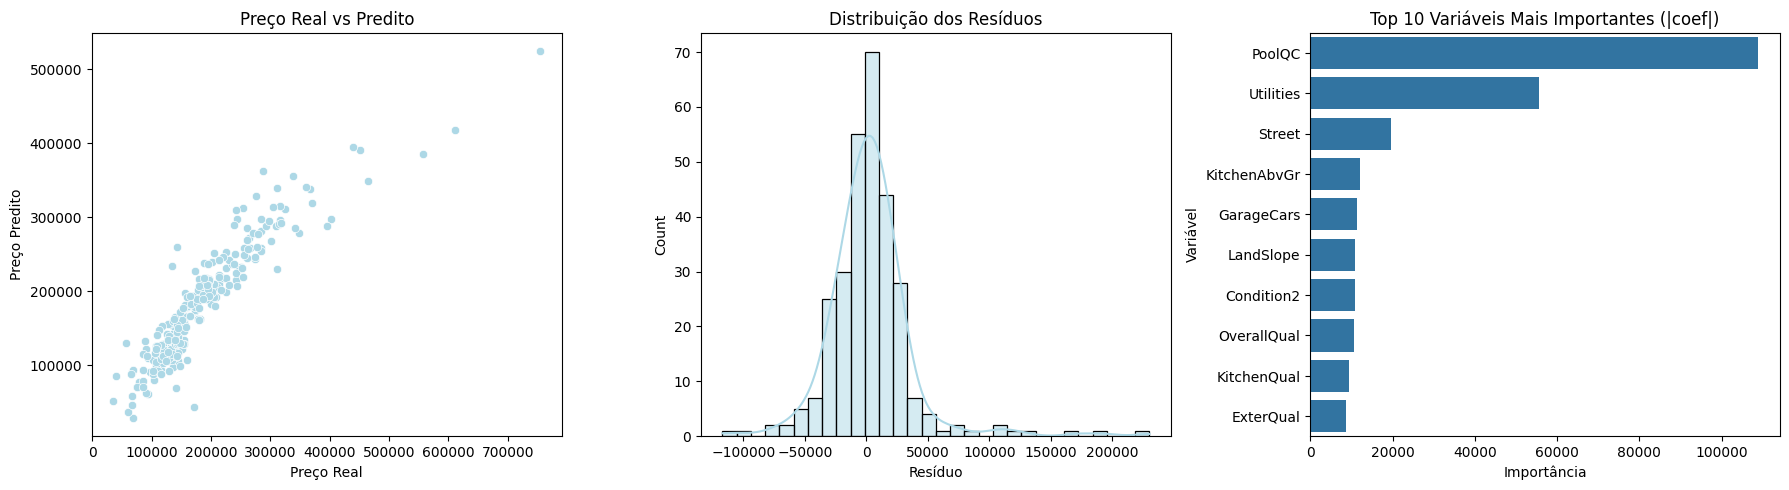

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. Verificando valores nulos
# nulls = df.isnull().sum()
# null_cols = nulls[nulls > 0].index.tolist()
# print("Colunas com valores nulos:", null_cols)

# 2. Remover colunas com muitos nulos e preencher outras
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna("None", inplace=True)

# 3. Codificação das variáveis categóricas
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 4. Separar variáveis preditoras e alvo
X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# 5. Separação treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# 6. Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Previsões
y_pred = model.predict(X_test)

# 8. Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

# 9. Gráficos
plt.figure(figsize=(18, 5))

# Gráfico de dispersão
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, color='lightblue')
plt.xlabel("Preço Real")
plt.ylabel("Preço Predito")
plt.title("Preço Real vs Predito")

# Resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, color='lightblue', kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo")

# 11. Importância das variáveis
coefs = model.coef_
feature_names = X.columns

coef_df = pd.DataFrame({
    "Variável": feature_names,
    "Coeficiente": coefs,
    "Importância": np.abs(coefs)
}).sort_values(by="Importância", ascending=False)

top_10 = coef_df.head(10)

# Gráfico de importância
plt.subplot(1, 3, 3)
sns.barplot(x="Importância", y="Variável", data=top_10)
plt.title("Top 10 Variáveis Mais Importantes (|coef|)")

plt.tight_layout()
plt.show()


# Random Forest


 Resultados do RandomForestRegressor:
MAE: 17551.84
MSE: 801181272.63
R²: 0.8955


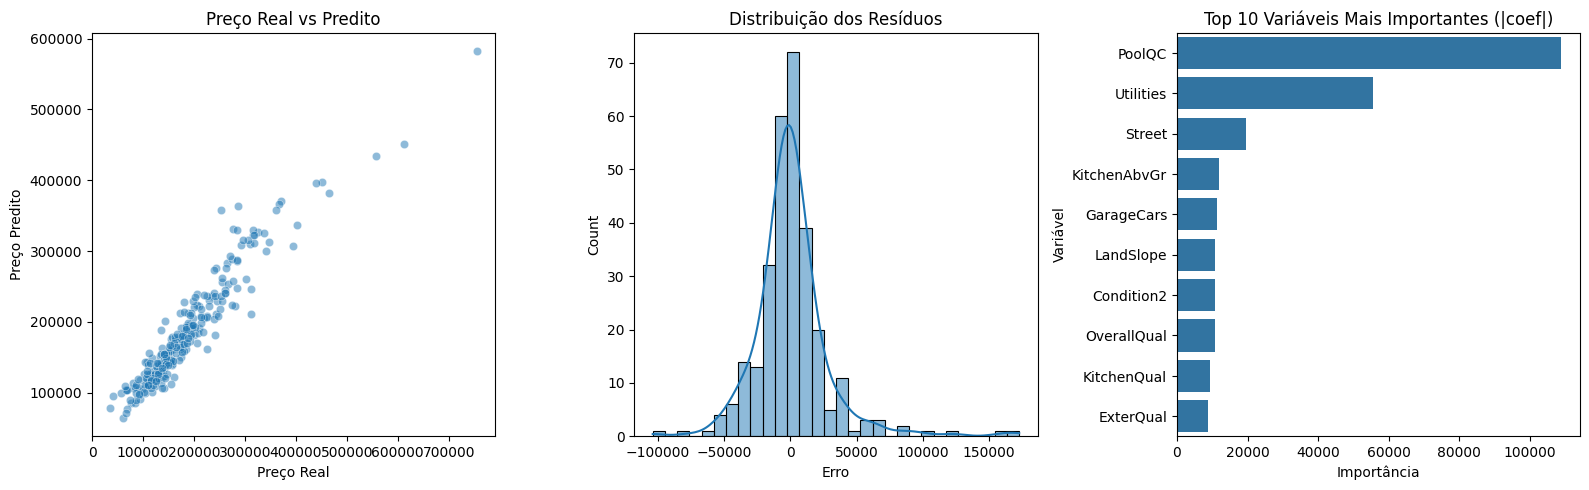

In [25]:
from sklearn.ensemble import RandomForestRegressor

# 6. Treinar modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 7. Previsões
y_pred = rf.predict(X_test)

# 8. Avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n Resultados do RandomForestRegressor:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

# 9. Gráfico: Preço real vs predito
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Preço Real")
plt.ylabel("Preço Predito")
plt.title("Preço Real vs Predito")

# 10. Gráfico: Distribuição dos resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro")

# 11. Importância das variáveis
coefs = model.coef_
feature_names = X.columns

coef_df = pd.DataFrame({
    "Variável": feature_names,
    "Coeficiente": coefs,
    "Importância": np.abs(coefs)
}).sort_values(by="Importância", ascending=False)

top_10 = coef_df.head(10)

# Gráfico de importância
plt.subplot(1, 3, 3)
sns.barplot(x="Importância", y="Variável", data=top_10)
plt.title("Top 10 Variáveis Mais Importantes (|coef|)")

plt.tight_layout()
plt.show()


# XGBoost

In [26]:
#!pip install xgboost


📊 Resultados do XGBoost:
MAE: 16317.67
MSE: 659102356.72
R²: 0.9141


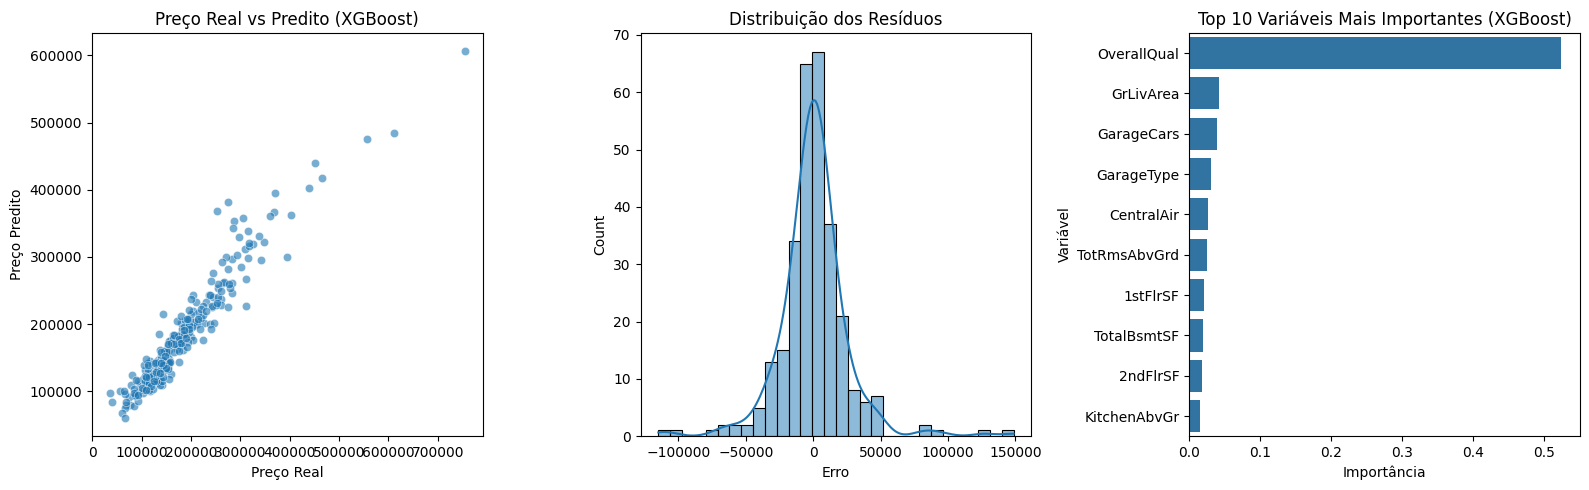

In [31]:
from xgboost import XGBRegressor, plot_importance
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 5. Treinar modelo XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# 6. Previsões
y_pred = xgb.predict(X_test)

# 7. Avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Resultados do XGBoost:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

# 8. Gráficos
plt.figure(figsize=(16, 5))

# Real vs Predito
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Preço Real")
plt.ylabel("Preço Predito")
plt.title("Preço Real vs Predito (XGBoost)")

# Resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro")

# 11. Importância das variáveis do XGBoost
importances = xgb.feature_importances_
feature_names = X.columns

importances_df = pd.DataFrame({
    "Variável": feature_names,
    "Importância": importances
}).sort_values(by="Importância", ascending=False)

top_10 = importances_df.head(10)

# Gráfico de importância
plt.subplot(1, 3, 3)
sns.barplot(x="Importância", y="Variável", data=top_10)
plt.title("Top 10 Variáveis Mais Importantes (XGBoost)")

plt.tight_layout()
plt.show()

# Comparando os Regressão Linear, Random Forest e XGBoost

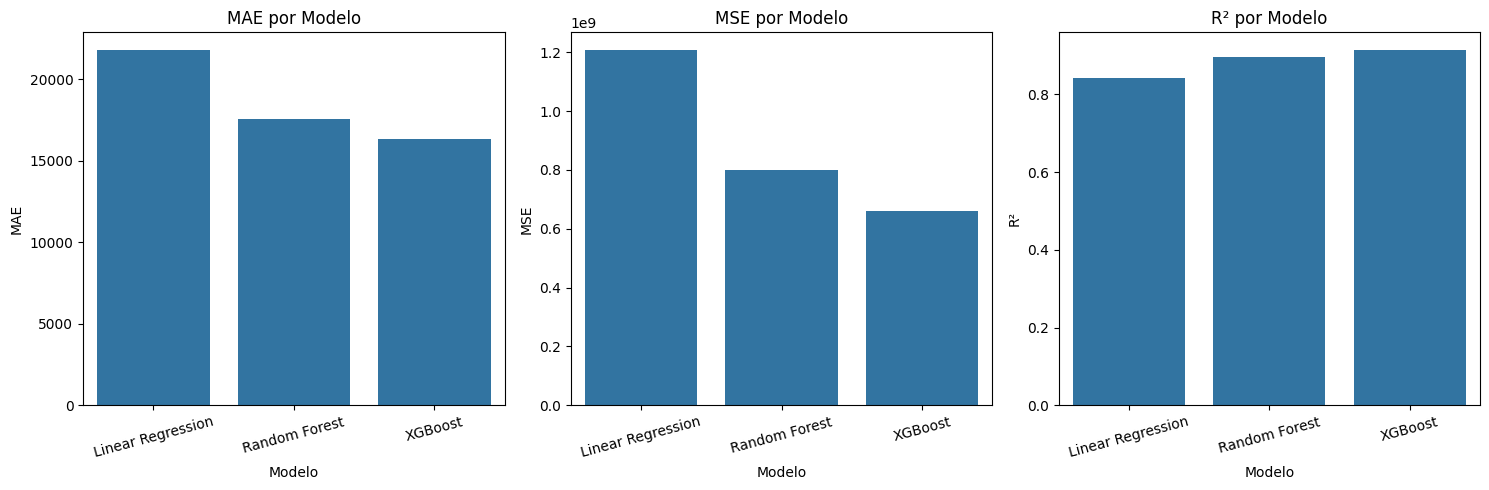


📋 Tabela de métricas comparativas:
              Modelo        MAE           MSE     R²
0  Linear Regression  21785.709  1.207137e+09  0.843
1      Random Forest  17551.844  8.011813e+08  0.896
2            XGBoost  16317.674  6.591024e+08  0.914


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Dicionário para armazenar as métricas
results = {}

# Função para treinar modelo, prever e calcular métricas
def avaliar_modelo(nome, modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[nome] = {"MAE": mae, "MSE": mse, "R²": r2}

# Treinar e avaliar os três modelos
avaliar_modelo("Linear Regression", LinearRegression())
avaliar_modelo("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42))
avaliar_modelo("XGBoost", XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))

# Converter resultados em DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Modelo"})

# Gráficos de comparação
plt.figure(figsize=(15, 5))

# MAE
plt.subplot(1, 3, 1)
sns.barplot(data=results_df, x="Modelo", y="MAE")
plt.title("MAE por Modelo")
plt.xticks(rotation=15)

# MSE
plt.subplot(1, 3, 2)
sns.barplot(data=results_df, x="Modelo", y="MSE")
plt.title("MSE por Modelo")
plt.xticks(rotation=15)

# R²
plt.subplot(1, 3, 3)
sns.barplot(data=results_df, x="Modelo", y="R²")
plt.title("R² por Modelo")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

# Exibir os valores também
print("\n Tabela de métricas comparativas:")
print(results_df.round(3))